In [1]:
using DelimitedFiles
using Plots
using Interpolations
using LaTeXStrings
using QuadGK
using SpecialFunctions

In [2]:
θ12_NO = 34.3*(π/180)
θ23_NO = 49.26*(π/180)
θ13_NO = 8.53*(π/180)
δcp_NO = 194*(π/180)

θ12_IO = 34.3*(π/180)
θ23_IO = 49.46*(π/180)
θ13_IO = 8.58*(π/180)
δcp_IO = 284*(π/180)

U1_NO = [1 0 0;
      0 cos(θ23_NO) sin(θ23_NO);
      0 -sin(θ23_NO) cos(θ23_NO)]

U2_NO = [cos(θ13_NO) 0 sin(θ13_NO)*exp(-im*δcp_NO);
      0 1 0;
      -sin(θ13_NO)*exp(im*δcp_NO) 0 cos(θ13_NO)]

U3_NO = [cos(θ12_NO) sin(θ12_NO) 0;
      -sin(θ12_NO) cos(θ12_NO) 0;
      0 0 1]

U1_IO = [1 0 0;
      0 cos(θ23_IO) sin(θ23_IO);
      0 -sin(θ23_IO) cos(θ23_IO)]

U2_IO = [cos(θ13_IO) 0 sin(θ13_IO)*exp(-im*δcp_IO);
      0 1 0;
      -sin(θ13_IO)*exp(im*δcp_IO) 0 cos(θ13_IO)]

U3_IO = [cos(θ12_IO) sin(θ12_IO) 0;
      -sin(θ12_IO) cos(θ12_IO) 0;
      0 0 1]

U_NO = U1_NO*U2_NO*U3_NO

U_IO = U1_IO*U2_IO*U3_IO;

In [3]:
Usqred_NO = real(U_NO .* conj(U_NO))
Usqred_IO = real(U_IO .* conj(U_IO))

function Usqred(ordering)
    if ordering == "NO"
        return Usqred_NO
    elseif ordering == "IO"
        return Usqred_IO
    else
        return 0
    end
end

Usqred (generic function with 1 method)

In [4]:
δm2_21 = 7.5e-5 # eV²
δm2_31_NO = 2.55e-3
δm2_31_IO = -2.45e-3

# m2_1_NO (m2_3_NO) set the absolute mass scale, can't be less than 0
m2_1_NO = 0
m2_2_NO = δm2_21
m2_3_NO = δm2_21/2 + δm2_31_NO

m2_3_IO = 0
m2_1_IO = -δm2_31_IO - δm2_21
m2_2_IO = -δm2_31_IO + δm2_21
;

In [5]:
#              time        luminosity               <e>             <e^2>
#               "s"           "foe/s"           "MeV^1"           "MeV^2"

νe_112sm = readdlm("Data/neutrino_signal_nu_e-LS220-s11.2c.data", comments=true)
νebar_112sm = readdlm("Data/neutrino_signal_nubar_e-LS220-s11.2c.data", comments=true)
νx_112sm = readdlm("Data/neutrino_signal_nu_x-LS220-s11.2c.data", comments=true)

νe_270sm = readdlm("Data/neutrino_signal_nu_e-s27.0c-LS220.data", comments=true)
νebar_270sm = readdlm("Data/neutrino_signal_nubar_e-s27.0c-LS220.data", comments=true)
νx_270sm = readdlm("Data/neutrino_signal_nu_x-s27.0c-LS220.data", comments=true)

νe_bh = readdlm("Data/s40s7b2c_neutrino_signal_nu_e.dat", comments=true)
νebar_bh = readdlm("Data/s40s7b2c_neutrino_signal_nubar_e.dat", comments=true)
νx_bh = readdlm("Data/s40s7b2c_neutrino_signal_nu_x.dat", comments=true)
;

In [6]:
# 27 Solar Mass
lum_νe_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_270sm[:,1]),), νe_270sm[:,2], Gridded(Linear()))
lum_νe_270sm = extrapolate(lum_νe_270sm_ne, 0.0)

em1_νe_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_270sm[:,1]),), νe_270sm[:,3], Gridded(Linear()))
em1_νe_270sm = extrapolate(em1_νe_270sm_ne, 0.0)

em2_νe_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_270sm[:,1]),), νe_270sm[:,4], Gridded(Linear()))
em2_νe_270sm = extrapolate(em2_νe_270sm_ne, 0.0)

lum_νebar_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_270sm[:,1]),), νebar_270sm[:,2], Gridded(Linear()))
lum_νebar_270sm = extrapolate(lum_νebar_270sm_ne, 0.0)

em1_νebar_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_270sm[:,1]),), νebar_270sm[:,3], Gridded(Linear()))
em1_νebar_270sm = extrapolate(em1_νebar_270sm_ne, 0.0)

em2_νebar_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_270sm[:,1]),), νebar_270sm[:,4], Gridded(Linear()))
em2_νebar_270sm = extrapolate(em2_νebar_270sm_ne, 0.0)

lum_νx_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_270sm[:,1]),), νx_270sm[:,2], Gridded(Linear()))
lum_νx_270sm = extrapolate(lum_νx_270sm_ne, 0.0)

em1_νx_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_270sm[:,1]),), νx_270sm[:,3], Gridded(Linear()))
em1_νx_270sm = extrapolate(em1_νx_270sm_ne, 0.0)

em2_νx_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_270sm[:,1]),), νx_270sm[:,4], Gridded(Linear()))
em2_νx_270sm = extrapolate(em2_νx_270sm_ne, 0.0)

# 11.2 Solar Mass
lum_νe_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_112sm[:,1]),), νe_112sm[:,2], Gridded(Linear()))
lum_νe_112sm = extrapolate(lum_νe_112sm_ne, 0.0)

em1_νe_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_112sm[:,1]),), νe_112sm[:,3], Gridded(Linear()))
em1_νe_112sm = extrapolate(em1_νe_112sm_ne, 0.0)

em2_νe_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_112sm[:,1]),), νe_112sm[:,4], Gridded(Linear()))
em2_νe_112sm = extrapolate(em2_νe_112sm_ne, 0.0)

lum_νebar_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_112sm[:,1]),), νebar_112sm[:,2], Gridded(Linear()))
lum_νebar_112sm = extrapolate(lum_νebar_112sm_ne, 0.0)

em1_νebar_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_112sm[:,1]),), νebar_112sm[:,3], Gridded(Linear()))
em1_νebar_112sm = extrapolate(em1_νebar_112sm_ne, 0.0)

em2_νebar_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_112sm[:,1]),), νebar_112sm[:,4], Gridded(Linear()))
em2_νebar_112sm = extrapolate(em2_νebar_112sm_ne, 0.0)

lum_νx_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_112sm[:,1]),), νx_112sm[:,2], Gridded(Linear()))
lum_νx_112sm = extrapolate(lum_νx_112sm_ne, 0.0)

em1_νx_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_112sm[:,1]),), νx_112sm[:,3], Gridded(Linear()))
em1_νx_112sm = extrapolate(em1_νx_112sm_ne, 0.0)

em2_νx_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_112sm[:,1]),), νx_112sm[:,4], Gridded(Linear()))
em2_νx_112sm = extrapolate(em2_νx_112sm_ne, 0.0)

# Black Hole
lum_νe_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_bh[:,1]),), νe_bh[:,2], Gridded(Linear()))
lum_νe_bh = extrapolate(lum_νe_bh_ne, 0.0)

em1_νe_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_bh[:,1]),), νe_bh[:,3], Gridded(Linear()))
em1_νe_bh = extrapolate(em1_νe_bh_ne, 0.0)

em2_νe_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_bh[:,1]),), νe_bh[:,4], Gridded(Linear()))
em2_νe_bh = extrapolate(em2_νe_bh_ne, 0.0)

lum_νebar_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_bh[:,1]),), νebar_bh[:,2], Gridded(Linear()))
lum_νebar_bh = extrapolate(lum_νebar_bh_ne, 0.0)

em1_νebar_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_bh[:,1]),), νebar_bh[:,3], Gridded(Linear()))
em1_νebar_bh = extrapolate(em1_νebar_bh_ne, 0.0)

em2_νebar_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_bh[:,1]),), νebar_bh[:,4], Gridded(Linear()))
em2_νebar_bh = extrapolate(em2_νebar_bh_ne, 0.0)

lum_νx_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_bh[:,1]),), νx_bh[:,2], Gridded(Linear()))
lum_νx_bh = extrapolate(lum_νx_bh_ne, 0.0)

em1_νx_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_bh[:,1]),), νx_bh[:,3], Gridded(Linear()))
em1_νx_bh = extrapolate(em1_νx_bh_ne, 0.0)

em2_νx_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_bh[:,1]),), νx_bh[:,4], Gridded(Linear()))
em2_νx_bh = extrapolate(em2_νx_bh_ne, 0.0)
;

In [7]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
t = νe_270sm[:, 1]

pl_1 = plot(t, [lum_νe_270sm.(t) lum_νebar_270sm.(t) lum_νx_270sm.(t)], xlim=(0, 0.03), ylim=(0, 400), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"L_{\nu_{\beta}}~[\mathrm{foe~s^{-1}}]", legendfontsize=15, yguidefontsize=15)
pl_2 = plot(t, [lum_νe_270sm.(t) lum_νebar_270sm.(t) lum_νx_270sm.(t)], xlim=(0.03, 1.1), ylim=(0, 80), lw=1.5, c=[:blue :red :orange], label=false, title=L"27.0~M_\odot", titlefontsize=17)
pl_3 = plot(t, [lum_νe_270sm.(t) lum_νebar_270sm.(t) lum_νx_270sm.(t)], xlim=(1.1, 11), ylim=(0, 12), lw=1.5, c=[:blue :red :orange], label=false)

pe_1 = plot(t, [em1_νe_270sm.(t) em1_νebar_270sm.(t) em1_νx_270sm.(t)], xlim=(0, 0.03), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], ylabel=L"\langle E_{\nu_\beta} \rangle~[\mathrm{MeV}]", yguidefontsize=15, label=false)
pe_2 = plot(t, [em1_νe_270sm.(t) em1_νebar_270sm.(t) em1_νx_270sm.(t)], xlim=(0.03, 1.1), ylim=(0, 18), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~\mathrm{[s]}", xguidefontsize=15, label=false)
pe_3 = plot(t, [em1_νe_270sm.(t) em1_νebar_270sm.(t) em1_νx_270sm.(t)], xlim=(1.1, 11), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], label=false)

plot(pl_1, pl_2, pl_3, pe_1, pe_2, pe_3, size=(1000,500), layout=(2,3), margins=5Plots.mm)
=#

In [8]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
pl_1 = plot(t, [lum_νe_112sm.(t) lum_νebar_112sm.(t) lum_νx_112sm.(t)], xlim=(0, 0.03), ylim=(0, 400), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"L_{\nu_{\beta}}~[\mathrm{foe~s^{-1}}]", legendfontsize=15, yguidefontsize=15)
pl_2 = plot(t, [lum_νe_112sm.(t) lum_νebar_112sm.(t) lum_νx_112sm.(t)], xlim=(0.03, 1.1), ylim=(0, 80), lw=1.5, c=[:blue :red :orange], label=false, title=L"11.2~M_\odot", titlefontsize=17)
pl_3 = plot(t, [lum_νe_112sm.(t) lum_νebar_112sm.(t) lum_νx_112sm.(t)], xlim=(1.1, 11), ylim=(0, 12), lw=1.5, c=[:blue :red :orange], label=false)

pe_1 = plot(t, [em1_νe_112sm.(t) em1_νebar_112sm.(t) em1_νx_112sm.(t)], xlim=(0, 0.03), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], ylabel=L"\langle E_{\nu_\beta} \rangle~[\mathrm{MeV}]", yguidefontsize=15, label=false)
pe_2 = plot(t, [em1_νe_112sm.(t) em1_νebar_112sm.(t) em1_νx_112sm.(t)], xlim=(0.03, 1.1), ylim=(0, 18), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~\mathrm{[s]}", xguidefontsize=15, label=false)
pe_3 = plot(t, [em1_νe_112sm.(t) em1_νebar_112sm.(t) em1_νx_112sm.(t)], xlim=(1.1, 11), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], label=false)

plot(pl_1, pl_2, pl_3, pe_1, pe_2, pe_3, size=(1000,500), layout=(2,3), margins=5Plots.mm)
=#

In [9]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
t = νe_bh[:,1]

pl_1 = plot(t, [lum_νe_bh.(t) lum_νebar_bh.(t) lum_νx_bh.(t)], xlim=(0, 0.03), ylim=(0, 400), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"L_{\nu_{\beta}}~[\mathrm{foe~s^{-1}}]", legendfontsize=15, yguidefontsize=15)
pl_2 = plot(t, [lum_νe_bh.(t) lum_νebar_bh.(t) lum_νx_bh.(t)], xlim=(0.03, 1.1), ylim=(0, 100), lw=1.5, c=[:blue :red :orange], label=false, title=L"\mathrm{BH}", titlefontsize=17)

pe_1 = plot(t, [em1_νe_bh.(t) em1_νebar_bh.(t) em1_νx_bh.(t)], xlim=(0, 0.03), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], ylabel=L"\langle E_{\nu_\beta} \rangle~[\mathrm{MeV}]", yguidefontsize=15, label=false)
pe_2 = plot(t, [em1_νe_bh.(t) em1_νebar_bh.(t) em1_νx_bh.(t)], xlim=(0.03, 1.1), ylim=(0, 25), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~\mathrm{[s]}", xguidefontsize=15, label=false)

plot(pl_1, pl_2, pe_1, pe_2, size=(600,600), layout=(2,2), margins=5Plots.mm)
=#

In [11]:
# β = e (electron), ebar (anti electron), x (non electron)
# sm = small (11.2 SM), large (27.0 SM), bh (Black Hole)

function L(t, β, sm)
    if β == "e" && sm == "small"
        return lum_νe_112sm(t)
    elseif β == "e" && sm == "large"
        return lum_νe_270sm(t)
    elseif β == "e" && sm == "bh"
        return lum_νe_bh(t)
    elseif β == "ebar" && sm == "small"
        return lum_νebar_112sm(t)
    elseif β == "ebar" && sm == "large"
        return lum_νebar_270sm(t)
    elseif β == "ebar" && sm == "bh"
        return lum_νebar_bh(t)    
    elseif β == "x" && sm == "small"
        return lum_νx_112sm(t)
    elseif β == "x" && sm == "large"
        return lum_νx_270sm(t)
    elseif β == "x" && sm == "bh"
        return lum_νx_bh(t)
    else
        return 0
    end
end

function Em1(t, β, sm)
    if β == "e" && sm == "small"
        return em1_νe_112sm(t)
    elseif β == "e" && sm == "large"
        return em1_νe_270sm(t)
    elseif β == "e" && sm == "bh"
        return em1_νe_bh(t)
    elseif β == "ebar" && sm == "small"
        return em1_νebar_112sm(t)
    elseif β == "ebar" && sm == "large"
        return em1_νebar_270sm(t)
    elseif β == "ebar" && sm == "bh"
        return em1_νebar_bh(t)    
    elseif β == "x" && sm == "small"
        return em1_νx_112sm(t)
    elseif β == "x" && sm == "large"
        return em1_νx_270sm(t)
    elseif β == "x" && sm == "bh"
        return em1_νx_bh(t)
    else
        return 0
    end
end

function Em2(t, β, sm)
    if β == "e" && sm == "small"
        return em2_νe_112sm(t)
    elseif β == "e" && sm == "large"
        return em2_νe_270sm(t)
    elseif β == "e" && sm == "bh"
        return em2_νe_bh(t)
    elseif β == "ebar" && sm == "small"
        return em2_νebar_112sm(t)
    elseif β == "ebar" && sm == "large"
        return em2_νebar_270sm(t)
    elseif β == "ebar" && sm == "bh"
        return em2_νebar_bh(t)    
    elseif β == "x" && sm == "small"
        return em2_νx_112sm(t)
    elseif β == "x" && sm == "large"
        return em2_νx_270sm(t)
    elseif β == "x" && sm == "bh"
        return em2_νx_bh(t)
    else
        return 0
    end
end

Em2 (generic function with 1 method)

In [12]:
α(t, β, sm) = (2*Em1(t, β, sm)^2 - Em2(t, β, sm))/(Em2(t, β, sm) - Em1(t, β, sm)^2)

α (generic function with 1 method)

In [13]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
t = range(0, 10, 100000)

pαs_1 = plot(t, [α.(t, "e", "small") α.(t, "ebar", "small") α.(t, "x", "small")], xlim=(0, 0.03), ylim=(0, 8), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"\alpha_{\nu_\beta}", legendfontsize=15, yguidefontsize=15)
pαs_2 = plot(t, [α.(t, "e", "small") α.(t, "ebar", "small") α.(t, "x", "small")], xlim=(0.03, 1.1), ylim=(1, 5), lw=1.5, c=[:blue :red :orange], label=false, title=L"11.2~M_\odot", titlefontsize=17)
pαs_3 = plot(t, [α.(t, "e", "small") α.(t, "ebar", "small") α.(t, "x", "small")], xlim=(1.1, 11), ylim=(2, 3.5), lw=1.5, c=[:blue :red :orange], label=false)

pαl_1 = plot(t, [α.(t, "e", "large") α.(t, "ebar", "large") α.(t, "x", "large")], xlim=(0, 0.03), ylim=(0, 8), lw=1.5, c=[:blue :red :orange], ylabel=L"\alpha_{\nu_\beta}", yguidefontsize=15, label=false)
pαl_2 = plot(t, [α.(t, "e", "large") α.(t, "ebar", "large") α.(t, "x", "large")], xlim=(0.03, 1.1), ylim=(1, 5), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~[\mathrm{s}]", title=L"27.0~M_\odot", titlefontsize=17, xguidefontsize=15, label=false)
pαl_3 = plot(t, [α.(t, "e", "large") α.(t, "ebar", "large") α.(t, "x", "large")], xlim=(1.1, 11), ylim=(2, 3.5), lw=1.5, c=[:blue :red :orange], label=false)

plot(pαs_1, pαs_2, pαs_3, pαl_1, pαl_2, pαl_3, size=(1000,500), layout=(2,3), margins=5Plots.mm)
=#

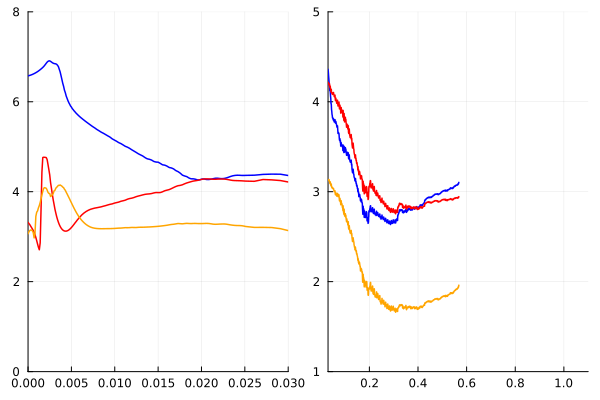

In [200]:
# Commenting out to reduce the notebook size, so it's visible on github
t = range(0, 10, 100000)
pαbh_1 = plot(t, [α.(t, "e", "bh") α.(t, "ebar", "bh") α.(t, "x", "bh")], xlim=(0, 0.03), ylim=(0, 8), lw=1.5, c=[:blue :red :orange], label=false)
pαbh_2 = plot(t, [α.(t, "e", "bh") α.(t, "ebar", "bh") α.(t, "x", "bh")], xlim=(0.03, 1.1), ylim=(1, 5), lw=1.5, c=[:blue :red :orange], label=false)
plot(pαbh_1, pαbh_2, layout=(1, 2))


In [15]:
function ϕ0(E, t, β, sm) 

    if Em1(t, β, sm) == 0
        return 0.0
    else
        return (E/Em1(t, β, sm))^(α(t, β, sm))*exp(-(E*(1+α(t, β, sm)))/Em1(t, β, sm))
    end
end;

In [16]:
# Old method of calculating the (normalized) energy distributions
#=
function ϕints(β, sm)

    nbins = 100000

    if β == "e" && sm == "small"
        ts = range(minimum(νe_112sm[:, 1]), maximum(νe_112sm[:, 1]), nbins)
    elseif β == "e" && sm == "large"
        ts = range(minimum(νe_270sm[:, 1]), maximum(νe_270sm[:, 1]), nbins)
    elseif β == "e" && sm == "bh"
        ts = range(minimum(νe_bh[:, 1]), maximum(νe_bh[:, 1]), nbins)
    elseif β == "ebar" && sm == "small"
        ts = range(minimum(νebar_112sm[:, 1]), maximum(νebar_112sm[:, 1]), nbins)
    elseif β == "ebar" && sm == "large"
        ts = range(minimum(νebar_270sm[:, 1]), maximum(νebar_270sm[:, 1]), nbins)
    elseif β == "ebar" && sm == "bh"
        ts = range(minimum(νebar_bh[:, 1]), maximum(νebar_bh[:, 1]), nbins)   
    elseif β == "x" && sm == "small"
        ts = range(minimum(νx_112sm[:, 1]), maximum(νx_112sm[:, 1]), nbins)
    elseif β == "x" && sm == "large"
        ts = range(minimum(νx_270sm[:, 1]), maximum(νx_270sm[:, 1]), nbins)
    elseif β == "x" && sm == "bh"
        ts = range(minimum(νx_bh[:, 1]), maximum(νx_bh[:, 1]), nbins)
    else
        return 0
    end

    ϕintsvec = quadgk.(e -> ϕ0.(e, ts, β, sm), 0, 50, rtol=1e-8)[1]

    ϕint_ne = Interpolations.interpolate((vec(ts),), ϕintsvec, Gridded(Linear()))
    return extrapolate(ϕint_ne, 0.0)
end


ϕ_νe_270sm, ϕ_νebar_270sm, ϕ_νx_270sm = ϕints("e", "large"), ϕints("ebar", "large"), ϕints("x", "large")
ϕ_νe_112sm, ϕ_νebar_112sm, ϕ_νx_112sm = ϕints("e", "small"), ϕints("ebar", "small"), ϕints("x", "small")
ϕ_νe_bh, ϕ_νebar_bh, ϕ_νx_bh = ϕints("e", "bh"), ϕints("ebar", "bh"), ϕints("x", "bh");


function ξ(t, β, sm)
    if Em1(t, β, sm) == 0
        return 0.0
    else
        if β == "e" && sm == "small"
            return 1/ϕ_νe_112sm(t)
        elseif β == "e" && sm == "large"
            return 1/ϕ_νe_270sm(t)
        elseif β == "e" && sm == "bh"
            return 1/ϕ_νe_bh(t)
        elseif β == "ebar" && sm == "small"
            return 1/ϕ_νebar_112sm(t)
        elseif β == "ebar" && sm == "large"
            return 1/ϕ_νebar_270sm(t)
        elseif β == "ebar" && sm == "bh"
            return 1/ϕ_νebar_bh(t)    
        elseif β == "x" && sm == "small"
            return 1/ϕ_νx_112sm(t)
        elseif β == "x" && sm == "large"
            return 1/ϕ_νx_270sm(t)
        elseif β == "x" && sm == "bh"
            return 1/ϕ_νx_bh(t)
        else
            return 0
        end
    end
end

# Using numerical normalization
ϕold(E, t, β, sm) = ξ(t, β, sm)*ϕ0(E, t, β, sm)
=#

In [17]:
intϕ_exact(t, β, sm) = Em1(t, β, sm)^(-α(t, β, sm))*((1+α(t, β, sm))/Em1(t, β, sm))^(-1-α(t, β, sm))*gamma(1+α(t, β, sm))

# Using analytical normalizaiton
function ϕ(E, t, β, sm)
    if Em1(t, β, sm) == 0
        return 0.0
    else
        return ϕ0(E, t, β, sm) / intϕ_exact(t, β, sm)
    end
end

ϕ (generic function with 1 method)

In [18]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
es = range(0, 50, 1000)

p1 = plot(es, 
    [ϕ.(es, 0.001, "e", "large") ϕ.(es, 0.001, "ebar", "large") ϕ.(es, 0.001, "x", "large")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], 
    ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"t_\mathrm{pb} = 0.001~\mathrm{s},~27.0~M_\odot",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p2 = plot(es, 
    [ϕ.(es, 0.1, "e", "large") ϕ.(es, 0.1, "ebar", "large") ϕ.(es, 0.1, "x", "large")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"t_\mathrm{pb} = 0.1~\mathrm{s}",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p3 = plot(es, 
    [ϕ.(es, 1, "e", "large") ϕ.(es, 1, "ebar", "large") ϕ.(es, 3, "x", "large")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"t_\mathrm{pb} = 3~\mathrm{s}",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p4 = plot(es, 
    [ϕ.(es, 0.001, "e", "small") ϕ.(es, 0.001, "ebar", "small") ϕ.(es, 0.001, "x", "small")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"11.2~M_\odot",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p5 = plot(es, 
    [ϕ.(es, 0.1, "e", "small") ϕ.(es, 0.1, "ebar", "small") ϕ.(es, 0.1, "x", "small")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    xlabel=L"E_\nu~[\mathrm{MeV}]",
    legendfontsize=15, 
    xguidefontsize=15)

p6 = plot(es, 
    [ϕ.(es, 1, "e", "small") ϕ.(es, 1, "ebar", "small") ϕ.(es, 3, "x", "small")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    legendfontsize=15, 
    yguidefontsize=15)

plot(p1, p2, p3, p4, p5, p6, layout=(2,3), ylim=(0, 0.3), size=(1000, 400), margins=6Plots.mm)
=#

In [224]:
function dF0(E, t, β, sm) 
    if Em1(t, β, sm) == 0
        return 0.0
    else
        return L(t, β, sm) * ϕ(E, t, β, sm)/Em1(t, β, sm)
    end
end

loe_to_MeV = 6.2415e56

function fake_tint_F0(energy, β, sm)
    ts_int = range(-0.4, 9, 10000)
    dts_int = ts_int[2] - ts_int[1]
    return sum(dts_int * dF0.(energy, ts_int, β, sm))
end;

In [46]:
F_sim = readdlm("Data/time-integrated_s11_v2.txt", comments=true)

F_sim_es, F_sim_νe_NO, F_sim_νx_NO, F_sim_νebar_NO, F_sim_νxbar_NO, F_sim_νe_IO, F_sim_νx_IO, F_sim_νebar_IO, F_sim_νxbar_IO, 
F0_sim_νe, F0_sim_νx, F0_sim_νebar, F0_sim_νxbar  = [F_sim[:, i] for i in 1:13];

In [294]:
F_bh = readdlm("Data/time-integrated_s40_v2.txt", comments=true)

F_bh_es, F_bh_νe_NO, F_bh_νx_NO, F_bh_νebar_NO, F_bh_νxbar_NO, F_bh_νe_IO, F_bh_νx_IO, F_bh_νebar_IO, F_bh_νxbar_IO, 
F0_bh_νe, F0_bh_νx, F0_bh_νebar, F0_bh_νxbar  = [F_bh[:, i] for i in 1:13];

In [21]:
function F0_tint(β, sm)
    es = range(0, 50, 1000)
    tintF0 = fake_tint_F0.(es, β, sm)
    F0int_ne = Interpolations.interpolate((vec(es),), tintF0, Gridded(Linear()))
    return extrapolate(F0int_ne, 0.0)
end

F0_tint (generic function with 1 method)

In [362]:
# This will generate the data needed to compute time-integrated supernova fluxes (just take the vectors and integrate wrt the es variable)
#=
function F0_tint_vec(β, sm)
    es = range(0, 100, 2000)
    tintF0 = fake_tint_F0.(es, β, sm)
    return tintF0
end

F0_νe_270sm_vec, F0_νebar_270sm_vec, F0_νx_270sm_vec = F0_tint_vec("e", "large"), F0_tint_vec("ebar", "large"), F0_tint_vec("x", "large")
F0_νe_112sm_vec, F0_νebar_112sm_vec, F0_νx_112sm_vec = F0_tint_vec("e", "small"), F0_tint_vec("ebar", "small"), F0_tint_vec("x", "small")
F0_νe_bh_vec, F0_νebar_bh_vec, F0_νx_bh_vec = F0_tint_vec("e", "bh"), F0_tint_vec("ebar", "bh"), F0_tint_vec("x", "bh");

F0s_vec = hcat(F0_νe_270sm_vec, F0_νebar_270sm_vec, F0_νx_270sm_vec, F0_νe_112sm_vec, F0_νebar_112sm_vec, F0_νx_112sm_vec, F0_νe_bh_vec, F0_νebar_bh_vec, F0_νx_bh_vec)

writedlm("F0s_vec.txt", F0s_vec)
=#
;

In [365]:
function F0_tint_func(F0vec::Vector{Float64})
    es = range(0, 100, 2000)
    F0int_ne = Interpolations.interpolate((vec(es),), F0vec, Gridded(Linear()))
    return extrapolate(F0int_ne, 0.0)
end

F0_tint_func (generic function with 1 method)

In [367]:
F0s_vec = readdlm("F0s_vec.txt", comments=true)

F0_νe_270sm, F0_νebar_270sm, F0_νx_270sm = F0_tint_func(vec(F0s_vec[:, 1])), F0_tint_func(vec(F0s_vec[:, 2])), F0_tint_func(vec(F0s_vec[:, 3]))
F0_νe_112sm, F0_νebar_112sm, F0_νx_112sm = F0_tint_func(vec(F0s_vec[:, 4])), F0_tint_func(vec(F0s_vec[:, 5])), F0_tint_func(vec(F0s_vec[:, 6]))
F0_νe_bh, F0_νebar_bh, F0_νx_bh = F0_tint_func(vec(F0s_vec[:, 7])), F0_tint_func(vec(F0s_vec[:, 8])), F0_tint_func(vec(F0s_vec[:, 9]));

In [25]:
#=
F0_νe_270sm, F0_νebar_270sm, F0_νx_270sm = F0_tint("e", "large"), F0_tint("ebar", "large"), F0_tint("x", "large")
F0_νe_112sm, F0_νebar_112sm, F0_νx_112sm = F0_tint("e", "small"), F0_tint("ebar", "small"), F0_tint("x", "small")
F0_νe_bh, F0_νebar_bh, F0_νx_bh = F0_tint("e", "bh"), F0_tint("ebar", "bh"), F0_tint("x", "bh");
=#

In [368]:
function F0(E, β, sm)
    if β == "e" && sm == "small"
        return F0_νe_112sm(E)
    elseif β == "e" && sm == "large"
        return F0_νe_270sm(E)
    elseif β == "e" && sm == "bh"
        return F0_νe_bh(E)
    elseif β == "ebar" && sm == "small"
        return F0_νebar_112sm(E)
    elseif β == "ebar" && sm == "large"
        return F0_νebar_270sm(E)
    elseif β == "ebar" && sm == "bh"
        return F0_νebar_bh(E)   
    elseif β == "x" && sm == "small"
        return F0_νx_112sm(E)
    elseif β == "x" && sm == "large"
        return F0_νx_270sm(E)
    elseif β == "x" && sm == "bh"
        return F0_νx_bh(E)
    else
        return 0
    end
end

F0 (generic function with 1 method)

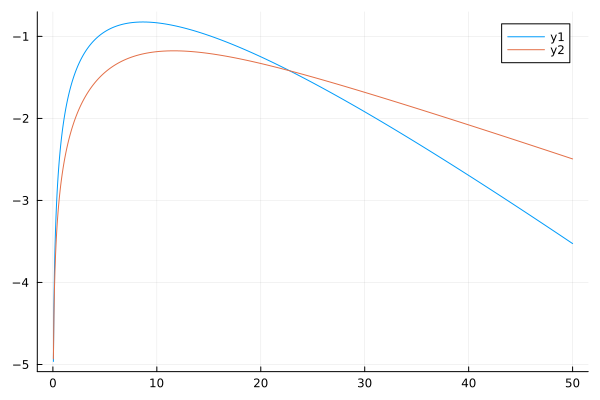

In [369]:
plot(es,
    [log10.(F0.(es, "x", "small")) log10.(F0.(es, "x", "bh"))])

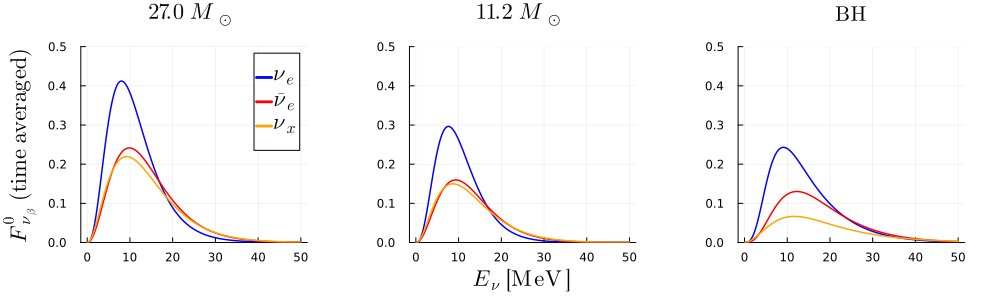

In [370]:

es = range(0, 50, 1000)

p1 = plot(es, 
    [F0_νe_270sm.(es) F0_νebar_270sm.(es) F0_νx_270sm.(es)],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"],
    title=L"27.0~M_\odot",
    ylabel=L"F^0_{\nu_\beta}~\mathrm{(time~averaged)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
    ylim=(0, 0.5))

p2 = plot(es, 
    [F0_νe_112sm.(es) F0_νebar_112sm.(es) F0_νx_112sm.(es)],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    title=L"11.2~M_\odot",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    ylim=(0, 0.5))

p3 = plot(es, 
    [F0_νe_bh.(es) F0_νebar_bh.(es) F0_νx_bh.(es)],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    title=L"\mathrm{BH}",
    ylim=(0, 0.5))

plot(p1, p2, p3, layout=(1,3), size=(1000, 300), margins=7Plots.mm)

    

In [28]:
#=
plot(F_sim_es, 
    [F0_sim_νe ./ loe_to_MeV F0_sim_νebar ./ loe_to_MeV F0_sim_νx ./ loe_to_MeV],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"],
    title=L"\mathrm{unoscillated~SN~fluxes}",
    ylabel=L"F^0_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15)
plot!(F_sim_es,
     [F0_νe_112sm.(F_sim_es) F0_νebar_112sm.(F_sim_es) F0_νx_112sm.(F_sim_es)],
     lw=3,
     alpha=0.5,
     ls=:dash,
     c=[:blue :red :orange],
     label=[L"\nu_e~\mathrm{(me)}" L"\bar{\nu}_e~\mathrm{(me)}" L"\bar{\nu}_x~\mathrm{(me)}"])
=#

In [241]:
# Accounting for oscillations thru the SN medium

s12 = 0.297
c12 = 1 - s12
PH = 0

# ordering = "NO" (normal ordering) or "IO" (inverted ordering)

function F(E, β, sm, ordering)
    if ordering == "NO"
        if β == "e"
            return F0(E, "x", sm)
        elseif β == "ebar"
            return c12*F0(E, "ebar", sm) + s12*F0(E, "x", sm)
        elseif β == "x"
            return 0.5*(F0(E, "e", sm) + F0(E, "x", sm))
        elseif β == "xbar"
            return 0.5*(s12*F0(E, "ebar", sm) + (1 + c12)*F0(E, "x", sm))
        else
            return 0
        end
    elseif ordering == "IO"
        if β == "e"
            return s12*F0(E, "e", sm) + c12*F0(E, "x", sm)
        elseif β == "ebar"
            return F0(E, "x", sm)
        elseif β == "x"
            return 0.5*(c12*F0(E, "e", sm) + (1 + s12)*F0(E, "x", sm))
        elseif β == "xbar"
            return 0.5*(F0(E, "ebar", sm) + F0(E, "x", sm))
        else
            return 0
        end
    else
        return 0
    end
end

#=
F_νe_270sm_NO(E) = s12*PH*(F0_νe_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νebar_270sm_NO(E) = c12*(F0_νebar_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νx_112sm_NO(E) = 0.25*(F0_νe_270sm(E) + s12*F0_νebar_270sm(E) + (2 + c12)*F0_νx_270sm(E))
F_νe_270sm_IO(E) = s12*(F0_νe_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νebar_270sm_IO(E) = c12*PH*(F0_νebar_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νx_270sm_IO(E) = 0.25*(c12*F0_νe_270sm(E) + F0_νebar_270sm(E) + (2 + s12)*F0_νx_270sm(E))

F_νe_112sm_NO(E) = s12*PH*(F0_νe_112sm(E) - F0_νx_112sm(E)) + F0_νx_112sm(E)
F_νebar_112sm_NO(E) = c12*F0_νebar_112sm(E) + s12*F0_νx_112sm(E)
F_νx_112sm_NO(E) = 0.25*(F0_νe_112sm(E) + s12*F0_νebar_112sm(E) + (2 + c12)*F0_νx_112sm(E))
F_νe_112sm_IO(E) = s12*(F0_νe_112sm(E) - F0_νx_112sm(E)) + F0_νx_112sm(E)
F_νebar_112sm_IO(E) = c12*PH*(F0_νebar_112sm(E) - F0_νx_112sm(E)) + F0_νx_112sm(E)
F_νx_112sm_IO(E) = 0.25*(c12*F0_νe_112sm(E) + F0_νebar_112sm(E) + (2 + s12)*F0_νx_112sm(E))

F_νe_bh_NO(E) = s12*PH*(F0_νe_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νebar_bh_NO(E) = c12*(F0_νebar_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νx_bh_NO(E) = 0.25*(F0_νe_bh(E) + s12*F0_νebar_bh(E) + (2 + c12)*F0_νx_bh(E))
F_νe_bh_IO(E) = s12*(F0_νe_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νebar_bh_IO(E) = c12*PH*(F0_νebar_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νx_bh_IO(E) = 0.25*(c12*F0_νe_bh(E) + F0_νebar_bh(E) + (2 + s12)*F0_νx_bh(E))

function Fold(E, β, sm, ordering)
    if ordering == "NO"
        if β == "e" && sm == "small"
            return F_νe_112sm_NO(E)
        elseif β == "e" && sm == "large"
            return F_νe_270sm_NO(E)
        elseif β == "e" && sm == "bh"
            return F_νe_bh_NO(E)
        elseif β == "ebar" && sm == "small"
            return F_νebar_112sm_NO(E)
        elseif β == "ebar" && sm == "large"
            return F_νebar_270sm_NO(E)
        elseif β == "ebar" && sm == "bh"
            return F_νebar_bh_NO(E)   
        elseif β == "x" && sm == "small"
            return F_νx_112sm_NO(E)
        elseif β == "x" && sm == "large"
            return F_νx_270sm_NO(E)
        elseif β == "x" && sm == "bh"
            return F_νx_bh_NO(E)
        else
            return 0
        end
    elseif ordering == "IO"
        if β == "e" && sm == "small"
            return F_νe_112sm_IO(E)
        elseif β == "e" && sm == "large"
            return F_νe_270sm_IO(E)
        elseif β == "e" && sm == "bh"
            return F_νe_bh_IO(E)
        elseif β == "ebar" && sm == "small"
            return F_νebar_112sm_IO(E)
        elseif β == "ebar" && sm == "large"
            return F_νebar_270sm_IO(E)
        elseif β == "ebar" && sm == "bh"
            return F_νebar_bh_IO(E)   
        elseif β == "x" && sm == "small"
            return F_νx_112sm_IO(E)
        elseif β == "x" && sm == "large"
            return F_νx_270sm_IO(E)
        elseif β == "x" && sm == "bh"
            return F_νx_bh_IO(E)
        else
            return 0
        end
    else
        return 0
    end
end
=#

# In the mass basis now: i = 1, 2, 3, antinu = true or false
function Fmass(E, i, sm, ordering, nubar)
    if nubar==false
        return Usqred(ordering)[1, i]*F(E, "e", sm, ordering) + (1 - Usqred(ordering)[1, i])*F(E, "x", sm, ordering)
    elseif nubar==true
        return Usqred(ordering)[1, i]*F(E, "ebar", sm, ordering) + (1 - Usqred(ordering)[1, i])*F(E, "x", sm, ordering)
    else
        return 0
    end
end

Fmass (generic function with 1 method)

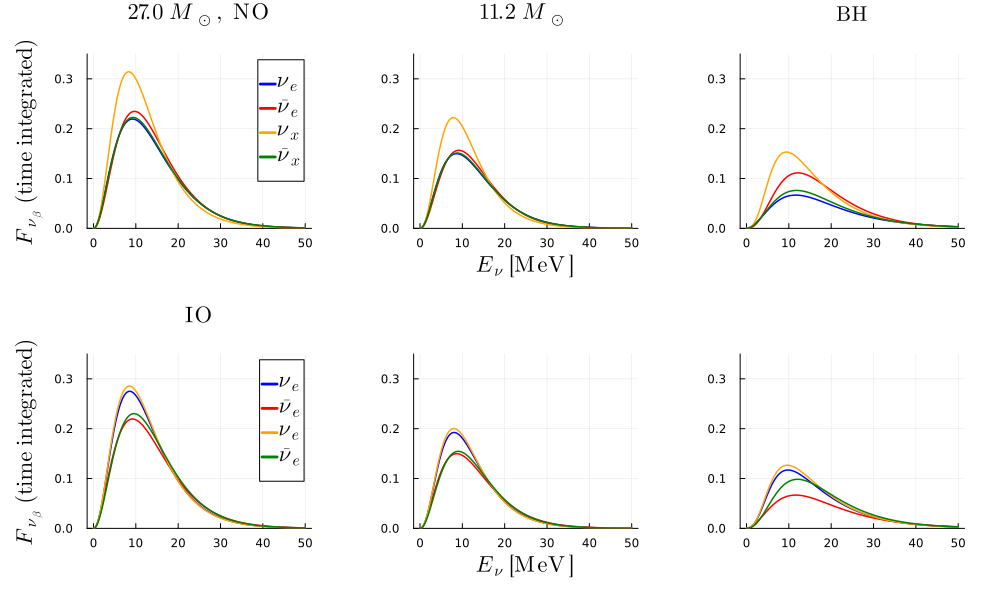

In [371]:

es = range(0, 50, 1000)

p1 = plot(es, 
    [F.(es, "e", "large", "NO") F.(es, "ebar", "large", "NO") F.(es, "x", "large", "NO") F.(es, "xbar", "large", "NO")],
    lw=1.5, 
    c=[:blue :red :orange :green], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x" L"\bar{\nu}_x"],
    title=L"27.0~M_\odot,~\mathrm{NO}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
    ylim=(0, 0.35))

p2 = plot(es, 
    [F.(es, "e", "small", "NO") F.(es, "ebar", "small", "NO") F.(es, "x", "small", "NO") F.(es, "xbar", "small", "NO")],
    lw=1.5, 
    c=[:blue :red :orange :green], 
    label=false,
    title=L"11.2~M_\odot",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    ylim=(0, 0.35))

p3 = plot(es, 
    [F.(es, "e", "bh", "NO") F.(es, "ebar", "bh", "NO") F.(es, "x", "bh", "NO") F.(es, "xbar", "bh", "NO")],
    lw=1.5, 
    c=[:blue :red :orange :green], 
    label=false,
    title=L"\mathrm{BH}",
    ylim=(0, 0.35))

p4 = plot(es, 
    [F.(es, "e", "large", "IO") F.(es, "ebar", "large", "IO") F.(es, "x", "large", "IO") F.(es, "xbar", "large", "IO")],
    lw=1.5, 
    c=[:blue :red :orange :green], 
    label=[L"\nu_e" L"\bar{\nu}_e"],
    title=L"\mathrm{IO}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
    ylim=(0, 0.35))

p5 = plot(es, 
    [F.(es, "e", "small", "IO") F.(es, "ebar", "small", "IO") F.(es, "x", "small", "IO") F.(es, "xbar", "small", "IO")],
    lw=1.5, 
    c=[:blue :red :orange :green], 
    label=false,
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    ylim=(0, 0.35))

p6 = plot(es, 
    [F.(es, "e", "bh", "IO") F.(es, "ebar", "bh", "IO") F.(es, "x", "bh", "IO") F.(es, "xbar", "bh", "IO")],
    lw=1.5, 
    c=[:blue :red :orange :green], 
    label=false,
    ylim=(0, 0.35))

plot(p1, p2, p3, p4, p5, p6, layout=(2,3), size=(1000, 600), margins=7Plots.mm)


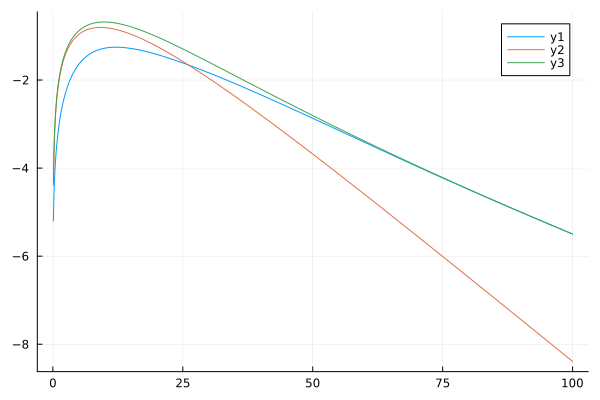

In [372]:
plot(
    F_sim_es,
    [log10.(0.5*F.(F_sim_es, "ebar", "bh", "NO")) log10.(F.(F_sim_es, "ebar", "small", "NO")) log10.(0.5*F.(F_sim_es, "ebar", "bh", "NO") .+ F.(F_sim_es, "ebar", "small", "NO"))]
)

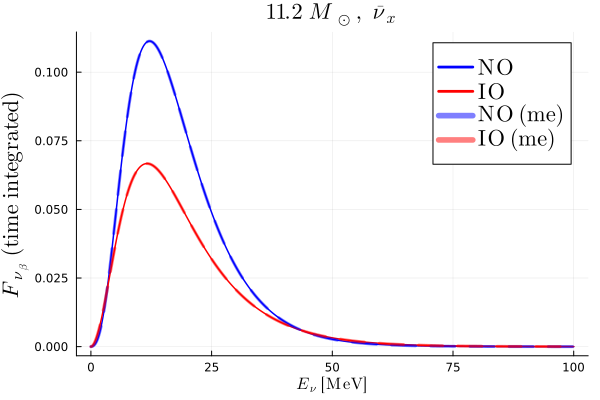

In [373]:
plot(F_sim_es, 
    [F_bh_νebar_NO ./ loe_to_MeV F_bh_νebar_IO ./ loe_to_MeV],
    lw=1.5, 
    c=[:blue :red], 
    label=[L"\mathrm{NO}" L"\mathrm{IO}"],
    title=L"11.2~M_\odot,~\bar{\nu}_x",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    xlabel=L"E_\nu~[\mathrm{MeV}]",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15)

plot!(F_sim_es,
     [F.(F_sim_es, "ebar", "bh", "NO") F.(F_sim_es, "ebar", "bh", "IO")],
     lw=3,
     alpha=0.5,
     ls=:dash,
     c=[:blue :red],
     label=[L"\mathrm{NO~(me)}" L"\mathrm{IO~(me)}"])


In [32]:
#=
plot(F_sim_es, 
    [F_sim_νe_IO ./ loe_to_MeV F_sim_νebar_IO ./ loe_to_MeV],
    lw=1.5, 
    c=[:blue :red], 
    label=[L"\nu_e" L"\bar{\nu}_e"],
    title=L"11.2~M_\odot,~\mathrm{IO}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15)
plot!(F_sim_es,
     [F.(F_sim_es, "e", "small", "IO") F.(F_sim_es, "ebar", "small", "IO")],
     lw=3,
     alpha=0.5,
     ls=:dash,
     c=[:blue :red],
     label=[L"\nu_e~\mathrm{(me)}" L"\bar{\nu}_e~\mathrm{(me)}"])
=#

In [374]:
# Supernova population functions

c0 = 3e8 # m s^(-1)

# Star formation rate (SFR)
SFR(z) = ((1 + z)^(-34) + ((1 + z)/5000)^3 + ((1 + z)/9)^(35))^(-0.1)

#Initial mass function (IMF)
η(M) = M^(-2.35)

# Unnormalized supernova rate (SNR0)
SNR0(z, M) = η(M) * SFR(z)

intSNR0 = quadgk(M -> SNR0(0, M), 8, 125)[1]
SNRnorm = 1.25e-4 / intSNR0 # units: 1.25e-4 Mpc^(-3) yr^(-1)

# Normalized SFR
SNR(z, M) = SNRnorm*SNR0(z, M);

# Hubble parameter dep on redshift:
function Hubble(z) 
    H0 = 70 # km s^(-1) Mpc^(-1)
    energy_matter, energy_dark = 0.3, 0.7
    return H0*sqrt(energy_matter*((1+z)^3) + energy_dark)
end

Hubble (generic function with 1 method)

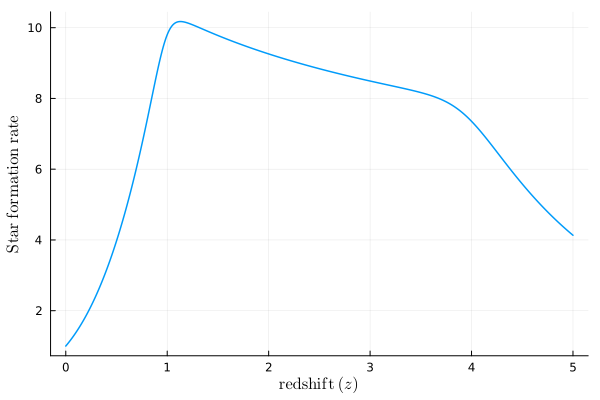

In [245]:
zs = range(0, 5, 1000)
plot(zs, SFR.(zs), lw=1.5, xlabel=L"\mathrm{redshift}~(z)", label=false, ylabel=L"\mathrm{Star~formation~rate}")

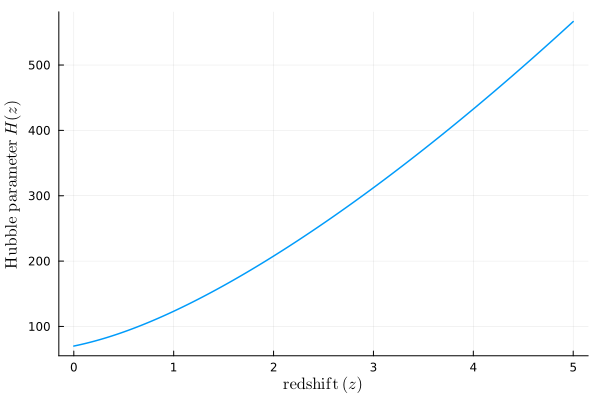

In [356]:
zs = range(0, 5, 1000)
plot(zs, Hubble.(zs), lw=1.5, xlabel=L"\mathrm{redshift}~(z)", label=false, ylabel=L"\mathrm{Hubble~parameter}~H(z)")

In [76]:
# Antiderivative of IMF evaluated at endpts
ηAD(m_max, m_min) = (m_max^(-1.35)-m_min^(-1.35))/(-1.35)

ηAD (generic function with 1 method)

In [77]:
# f_BH = 21 CCSN contributions
f21_112sm = ηAD(15, 8)/(ηAD(15, 8) + ηAD(22, 15)+ηAD(27, 25))
f21_27sm = (ηAD(22, 15)+ηAD(27, 25))/(ηAD(15, 8) + ηAD(22, 15)+ηAD(27, 25))

0.25325107598487523

In [332]:
(ηAD(25, 22)+ηAD(125, 27))/ηAD(125, 8)

0.214818389988136

In [375]:
function DSNB_f21_integrand(E, M, z, β, ordering)
    c0 = 3e8 # m s^(-1)
    return (c0*SNR(z, M)/Hubble(z)) * (F_f21_CCSN(E, M, z, β, ordering) + F_f21_BHSN(E, M, z, β, ordering))
end;

# Manually integrated the M, only have to take the redshift integral with this integrand
function DSNB_integrand_old(E, z, β, ordering, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (0.79*(f21_112sm*F(E*(1+z), β, "small", ordering) 
        + f21_27sm*F(E*(1+z), β, "large", ordering)) + 0.21*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (0.59*F(E*(1+z), β, "small", ordering) 
        + 0.41*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (0.91*F(E*(1+z), β, "small", ordering) 
        + 0.91*F(E*(1+z), β, "large", ordering) + 0.09*F(E*(1+z), β, "bh", ordering))
    else
        return 0
    end
end

# Pretty sure I was double counting the fractions in the above function, here's the corrected integrand
function DSNB_integrand_flavor(E, z, β, ordering, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + (ηAD(22, 15)+ηAD(27, 25))*F(E*(1+z), β, "large", ordering) + (ηAD(25, 22)+ηAD(125, 27))*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + ηAD(125, 15)*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + ηAD(40, 15)*F(E*(1+z), β, "large", ordering) + ηAD(125, 40)*F(E*(1+z), β, "bh", ordering))
    else
        return 0
    end
end

# In the mass basis, which is what we want for propagation thru the vacuum
function DSNB_integrand(E, z, i, ordering, nubar, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*Fmass(E*(1+z), i, "small", ordering, nubar) 
        + (ηAD(22, 15)+ηAD(27, 25))*Fmass(E*(1+z), i, "large", ordering, nubar) + (ηAD(25, 22)+ηAD(125, 27))*Fmass(E*(1+z), i, "bh", ordering, nubar))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*Fmass(E*(1+z), i, "small", ordering, nubar) 
        + ηAD(125, 15)*Fmass(E*(1+z), i, "bh", ordering, nubar))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*Fmass(E*(1+z), i, "small", ordering, nubar)
        + ηAD(40, 15)*Fmass(E*(1+z), i, "large", ordering, nubar) + ηAD(125, 40)*Fmass(E*(1+z), i, "bh", ordering, nubar))
    else
        return 0
    end
end

function DSNB_integrand_ccsn(E, z, i, ordering, nubar, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*Fmass(E*(1+z), i, "small", ordering, nubar) 
        + (ηAD(22, 15)+ηAD(27, 25))*Fmass(E*(1+z), i, "large", ordering, nubar))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * ηAD(15, 8)*Fmass(E*(1+z), i, "small", ordering, nubar) 
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*Fmass(E*(1+z), i, "small", ordering, nubar)
        + ηAD(40, 15)*Fmass(E*(1+z), i, "large", ordering, nubar))
    else
        return 0
    end
end

function DSNB_integrand_bhsn(E, z, i, ordering, nubar, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(25, 22)+ηAD(125, 27))*Fmass(E*(1+z), i, "bh", ordering, nubar)
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * ηAD(125, 15)*Fmass(E*(1+z), i, "bh", ordering, nubar)
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * ηAD(125, 40)*Fmass(E*(1+z), i, "bh", ordering, nubar)
    else
        return 0
    end
end

DSNB_integrand_bhsn (generic function with 2 methods)

In [40]:
first_int(E, z, β, ordering) = quadgk(M -> DSNB_f21_integrand(E, M, z, β, ordering), 8, 125)[1];
second_int(E, β, ordering) = 0.00208 * quadgk(z -> first_int(E, z, β, ordering), 0, 5)[1];

In [376]:
DSNBflavor(E, β, ordering, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_flavor.(E, z, β, ordering, bh_frac), 0, 5)[1]
DSNBmass(E, i, ordering, nubar, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand.(E, z, i, ordering, nubar, bh_frac), 0, 5)[1]

DSNBmasstest(E, i, ordering, nubar, bh_frac, zmax) = 0.00208 * quadgk.(z -> DSNB_integrand.(E, z, i, ordering, nubar, bh_frac), 0, zmax)[1]

DSNB_old(E, β, ordering, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_old.(E, z, β, ordering, bh_frac), 0, 5)[1]
DSNB_ccsn(E, i, ordering, nubar, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_ccsn.(E, z, i, ordering, nubar, bh_frac), 0, 5)[1]
DSNB_bhsn(E, i, ordering, nubar, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_bhsn.(E, z, i, ordering, nubar, bh_frac), 0, 5)[1]
# the 0.00208 is a normalization to make the units work out

DSNB_bhsn (generic function with 2 methods)

In [349]:
zmaxes = range(0.1, 8, 50)
dsnb_zmaxdep = DSNBmasstest.(10, 1, "NO", false, "21",zmaxes);

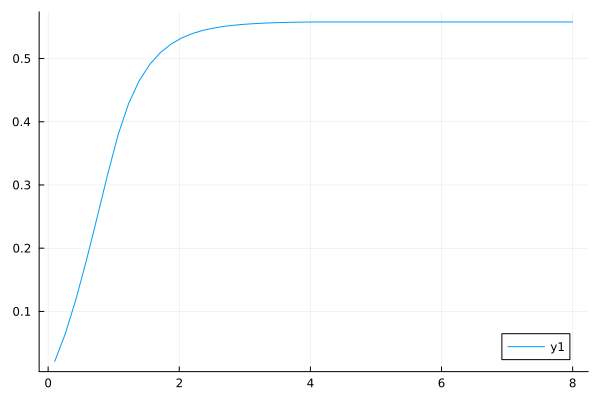

In [351]:
plot(
    zmaxes,
    dsnb_zmaxdep
)

In [251]:
es_dsnb = range(0, 40, 100)

0.0:0.40404040404040403:40.0

In [250]:
dsnbsimν1_ne = Interpolations.interpolate((vec(dsnb_sim_es),), dsnb_sim_ν1, Gridded(Linear()))
dsnbsimν1 = extrapolate(dsnbsimν1_ne, 0.0);

In [166]:
powerlawfunc(E, a, b) = b*exp(-a*E)

powerlawfunc (generic function with 2 methods)

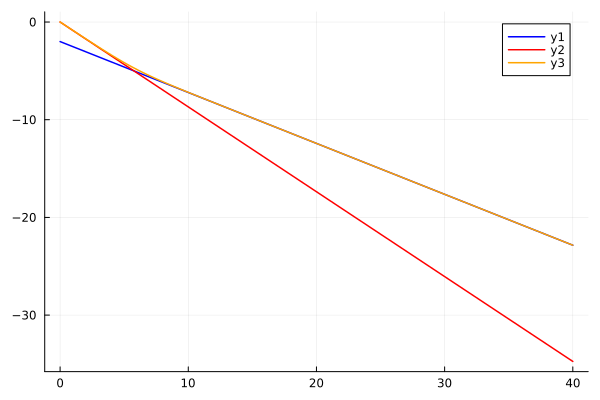

In [170]:
plot(
    es_dsnb,
    [log10.(powerlawfunc.(es_dsnb, 1.2, 0.01)) log10.(powerlawfunc.(es_dsnb, 2, 1)) log10.(powerlawfunc.(es_dsnb, 1.2, 0.01) .+ powerlawfunc.(es_dsnb, 2, 1))],
    c=[:blue :red :orange :black],
    lw=1.5,
)

In [377]:
dsnb_ccsn_1 = DSNB_ccsn.(es_dsnb, 1, "NO", false, "21")
dsnb_bhsn_1 = DSNB_bhsn.(es_dsnb, 1, "NO", false, "21")
dsnb_1 = DSNBmass.(es_dsnb, 1, "NO", false, "21");

In [378]:
dsnb_bhsn_1_test = dsnb_bhsn_1 .* powerlawfunc.(es_dsnb, 0);

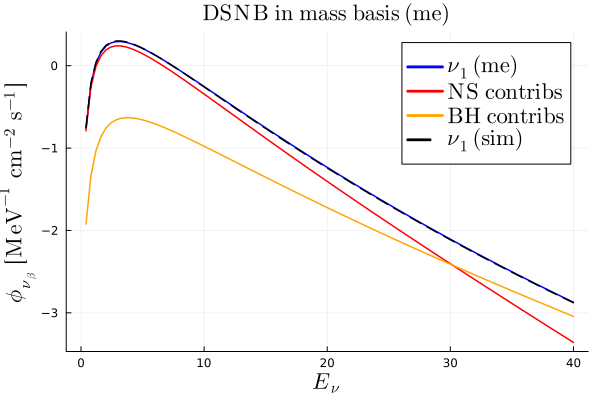

In [379]:
normtest = 1
p1 = plot(es_dsnb, 
    [log10.(dsnb_ccsn_1 .+ normtest*dsnb_bhsn_1_test) log10.(dsnb_ccsn_1) log10.(normtest*dsnb_bhsn_1_test) log10.(dsnbsimν1.(es_dsnb))],
    c=[:blue :red :orange :black],
    lw=1.5,
    ls=[:solid :solid :solid :dash],
    label=[L"\nu_1~\mathrm{(me)}" L"\mathrm{NS~contribs}" L"\mathrm{BH~contribs}" L"\nu_1~\mathrm{(sim)}"],
    title=L"\mathrm{DSNB~in~mass~basis~(me)}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    xlabel=L"E_\nu",
    xguidefontsize=15,
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
)

In [45]:
es_dsnb = range(0, 40, 100)

dsnb_test_e_f21 = DSNB.(es_dsnb, "e", "NO", "21")
dsnb_test_e_f41 = DSNB.(es_dsnb, "e", "NO", "41")
dsnb_test_e_f09 = DSNB.(es_dsnb, "e", "NO", "09")

dsnb_test_ebar_f21 = DSNB.(es_dsnb, "ebar", "NO", "21")
dsnb_test_ebar_f41 = DSNB.(es_dsnb, "ebar", "NO", "41")
dsnb_test_ebar_f09 = DSNB.(es_dsnb, "ebar", "NO", "09")

dsnb_test_e_f21_IO = DSNB.(es_dsnb, "e", "IO", "21")
dsnb_test_e_f41_IO = DSNB.(es_dsnb, "e", "IO", "41")
dsnb_test_e_f09_IO = DSNB.(es_dsnb, "e", "IO", "09")

dsnb_test_ebar_f21_IO = DSNB.(es_dsnb, "ebar", "IO", "21")
dsnb_test_ebar_f41_IO = DSNB.(es_dsnb, "ebar", "IO", "41")
dsnb_test_ebar_f09_IO = DSNB.(es_dsnb, "ebar", "IO", "09")
;

LoadError: InterruptException:

In [ ]:
dsnb_test_e_f21_ccsn = DSNB_ccsn.(es_dsnb, "e", "NO", "21")
dsnb_test_e_f41_ccsn = DSNB_ccsn.(es_dsnb, "e", "NO", "41")
dsnb_test_e_f09_ccsn = DSNB_ccsn.(es_dsnb, "e", "NO", "09")

dsnb_test_e_f21_bhsn = DSNB_bhsn.(es_dsnb, "e", "NO", "21")
dsnb_test_e_f41_bhsn = DSNB_bhsn.(es_dsnb, "e", "NO", "41")
dsnb_test_e_f09_bhsn = DSNB_bhsn.(es_dsnb, "e", "NO", "09");

In [313]:
DSNB_sim = readdlm("Data/DSNB-flux-nodecay-Miller_corrected.txt", comments=true)
dsnb_sim_es, dsnb_sim_ν1, dsnb_sim_ν2, dsnb_sim_ν3 = [DSNB_sim[:, i] for i in 1:4];

In [319]:
DSNB_sim_old = readdlm("Data/Miller-DSNB-flux.txt", comments=true)
dsnb_sim_es_old, dsnb_sim_ν1_old, dsnb_sim_ν2_old, dsnb_sim_ν3_old = [DSNB_sim_old[:, i] for i in 1:4];

In [325]:
dsnbsimν1_ne = Interpolations.interpolate((vec(dsnb_sim_es_old),), dsnb_sim_ν1_old, Gridded(Linear()))
dsnbsimν1 = extrapolate(dsnbsimν1_ne, 0.0);

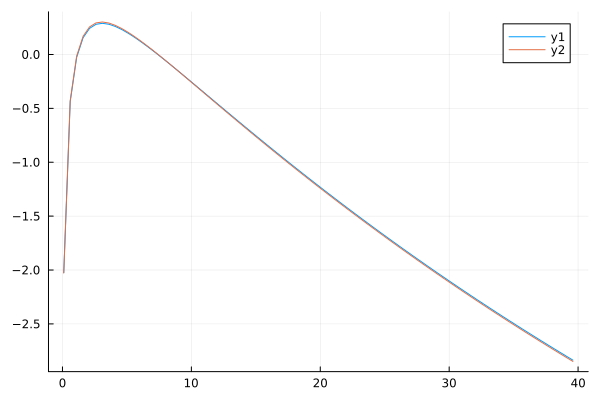

In [326]:
plot(
    dsnb_sim_es,
    [log10.(dsnb_sim_ν1) log10.(dsnbsimν1.(dsnb_sim_es))]
)

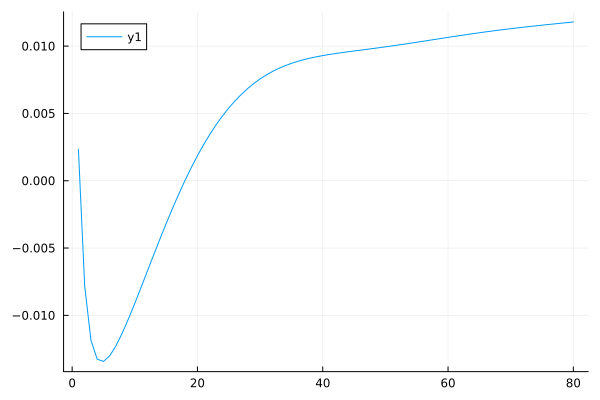

In [328]:
plot(log10.(dsnb_sim_ν1) .- log10.(dsnbsimν1.(dsnb_sim_es)))

In [90]:
dsnb_sim_νe = @. Usqred_NO[1, 1]*dsnb_sim_ν1 + Usqred_NO[1, 2]*dsnb_sim_ν2 + Usqred_NO[1, 3]*dsnb_sim_ν3;

In [ ]:
dsnb_test_e_f21_new = DSNB.(dsnb_sim_es, "e", "NO", "21")
# dsnb_test_e_f41_new = DSNB.(dsnb_sim_es, "e", "NO", "41")
# dsnb_test_e_f21_ccsn = DSNB_ccsn.(dsnb_sim_es, "e", "NO", "21")
# dsnb_test_e_f21_bhsn = DSNB_bhsn.(dsnb_sim_es, "e", "NO", "21")
;

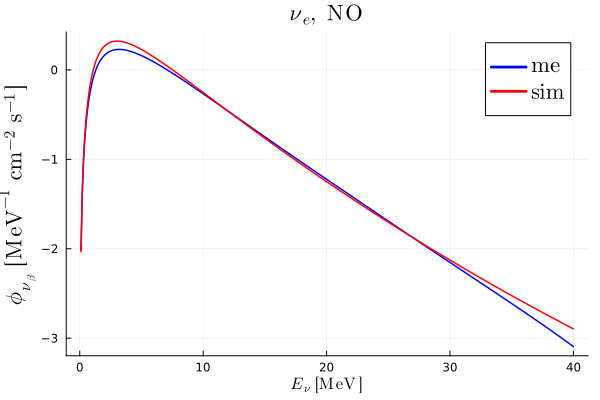

In [ ]:
p1 = plot(dsnb_sim_es, 
    [log10.(dsnb_test_e_f21_new) log10.(dsnb_sim_νe)],
    c=[:blue :red :orange :yellow],
    lw=1.5,
    ls=[:solid :solid],
    label=[L"\mathrm{me}" L"\mathrm{sim}"],
    title=L"\nu_e,~\mathrm{NO}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
)

In [ ]:
dsnb_test_e_f21_new ./ dsnb_sim_νe

400-element Vector{Float64}:
 0.2765189829262027
 0.2523393495758536
 0.23836848808348188
 0.22882836879510604
 0.2217919358196594
 0.21640038042557858
 0.2121996840231682
 0.20891809937491826
 0.20637495386954952
 0.2044389886535522
 0.20300823644713356
 0.20199998668952726
 0.20134549690699285
 ⋮
 0.35003745525960595
 0.3484786556747278
 0.3468979820641884
 0.3452952549011289
 0.3436703035067489
 0.34202294997891164
 0.3403530176655174
 0.33866032931527973
 0.3369447056120038
 0.335205968828138
 0.3334439395559835
 0.3316584373463296

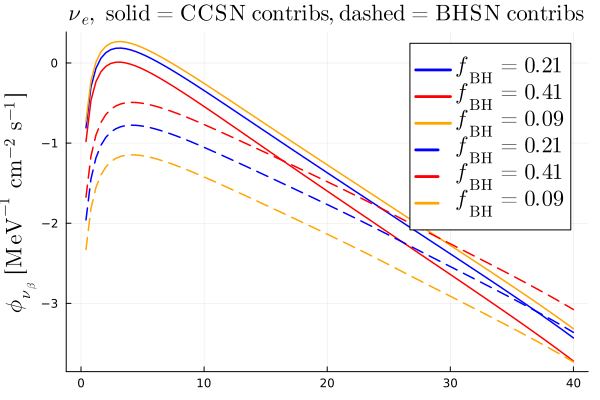

In [ ]:
p1 = plot(es_dsnb, 
    [log10.(dsnb_test_e_f21_ccsn) log10.(dsnb_test_e_f41_ccsn) log10.(dsnb_test_e_f09_ccsn) log10.(dsnb_test_e_f21_bhsn) log10.(dsnb_test_e_f41_bhsn) log10.(dsnb_test_e_f09_bhsn)],
    c=[:blue :red :orange],
    lw=1.5,
    ls=[:solid :solid :solid :dash :dash :dash],
    label=[L"f_\mathrm{BH} = 0.21" L"f_\mathrm{BH} = 0.41" L"f_\mathrm{BH} = 0.09" L"f_\mathrm{BH} = 0.21" L"f_\mathrm{BH} = 0.41" L"f_\mathrm{BH} = 0.09"],
    title=L"\nu_e,~\mathrm{solid=CCSN~contribs, dashed=BHSN~contribs}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
)

In [ ]:
dsnb_test_e_f21, dsnb_test_e_f21_ccsn, dsnb_test_e_f21_bhsn = DSNB.(es_dsnb, "e", "NO", "21"), DSNB_ccsn.(es_dsnb, "e", "NO", "21"), DSNB_bhsn.(es_dsnb, "e", "NO", "21");

([0.0, 0.16570447237803618, 0.5357247660735163, 0.9214224264076692, 1.2382964367811393, 1.4646887629092102, 1.6061302312337034, 1.6774715540819618, 1.694939518911194, 1.6730140528735342  …  0.0018184382625547762, 0.0016654667051746962, 0.0015245801765701097, 0.0013948070138943757, 0.0012752566836999565, 0.001165112532220255, 0.0010636255072652072, 0.0009701082710573936, 0.0008839327696229046, 0.0008045112439306495], [0.0, 0.15470425191595344, 0.5000635649745169, 0.8561678636971317, 1.144500621982351, 1.3465206235460743, 1.4688716483209636, 1.5263827526027003, 1.534722148436533, 1.507622779102435  …  0.000922785528256354, 0.0008362711603850293, 0.0007574066613631245, 0.0006855212816088826, 0.0006200036444612799, 0.0005602963481910015, 0.0005058911537312161, 0.0004563245340420715, 0.0004111746774300343, 0.0003700529488963607], [0.0, 0.011000220449901772, 0.03566120111731269, 0.0652545625164358, 0.09379581498067423, 0.11816809596794273, 0.1372585833911965, 0.15108879570199948, 0.160217244

In [92]:
dsnb_mass_test_1, dsnb_mass_test_2, dsnb_mass_test_3 = DSNBmass.(es_dsnb, 1, "NO", false, "21"), DSNBmass.(es_dsnb, 2, "NO", false, "21"), DSNBmass.(es_dsnb, 3, "NO", false, "21");

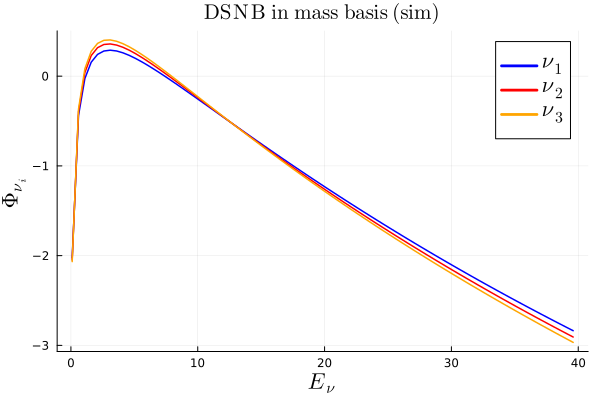

In [303]:
plot(
    dsnb_sim_es,
    [log10.(dsnb_sim_ν1) log10.(dsnb_sim_ν2) log10.(dsnb_sim_ν3)],
    lw=1.5,
    c=[:blue :red :orange],
    label=[L"\nu_1" L"\nu_2" L"\nu_3"],
    title=L"\mathrm{DSNB~in~mass~basis~(sim)}",
    xlabel=L"E_\nu",
    ylabel=L"\Phi_{\nu_i}",
    legendfontsize=15,
    xlabelfontsize=15,
    ylabelfontsize=15
)

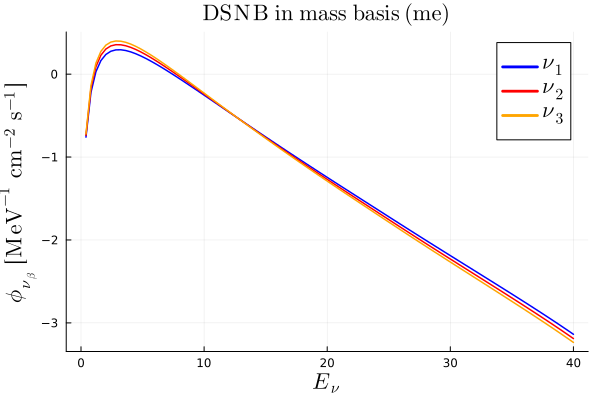

In [93]:
p1 = plot(es_dsnb, 
    [log10.(dsnb_mass_test_1) log10.(dsnb_mass_test_2) log10.(dsnb_mass_test_3)],
    c=[:blue :red :orange],
    lw=1.5,
    ls=[:solid :solid :solid],
    label=[L"\nu_1" L"\nu_2" L"\nu_3"],
    title=L"\mathrm{DSNB~in~mass~basis~(me)}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    xlabel=L"E_\nu",
    xguidefontsize=15,
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
)

In [380]:
dsnb_mass_test_1_comp = DSNBmass.(dsnb_sim_es, 1, "NO", false, "21");

In [381]:
dsnb_mass_test_2_comp = DSNBmass.(dsnb_sim_es, 2, "NO", false, "21");

In [382]:
dsnb_mass_test_3_comp = DSNBmass.(dsnb_sim_es, 3, "NO", false, "21");

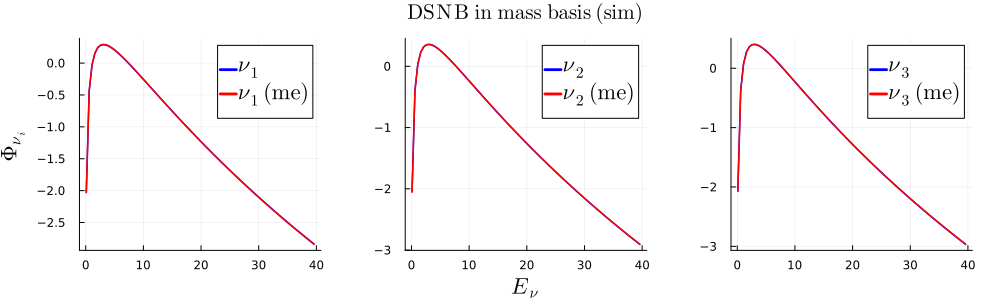

In [383]:
p1 = plot(
    dsnb_sim_es,
    [log10.(dsnb_sim_ν1) log10.(dsnb_mass_test_1_comp)],
    lw=1.5,
    c=[:blue :red :orange],
    label=[L"\nu_1" L"\nu_1~\mathrm{(me)}"],
    ylabel=L"\Phi_{\nu_i}",
    legendfontsize=15,
    xlabelfontsize=15,
    ylabelfontsize=15
)
p2 = plot(
    dsnb_sim_es,
    [log10.(dsnb_sim_ν2) log10.(dsnb_mass_test_2_comp)],
    lw=1.5,
    c=[:blue :red :orange],
    label=[L"\nu_2" L"\nu_2~\mathrm{(me)}"],
    title=L"\mathrm{DSNB~in~mass~basis~(sim)}",
    xlabel=L"E_\nu",
    legendfontsize=15,
    xlabelfontsize=15,
    ylabelfontsize=15
)
p3 = plot(
    dsnb_sim_es,
    [log10.(dsnb_sim_ν3) log10.(dsnb_mass_test_3_comp)],
    lw=1.5,
    c=[:blue :red :orange],
    label=[L"\nu_3" L"\nu_3~\mathrm{(me)}"],
    legendfontsize=15,
    xlabelfontsize=15,
    ylabelfontsize=15
)
plot(p1, p2, p3, layout=(1, 3), size=(1000, 300), margins=5Plots.mm)

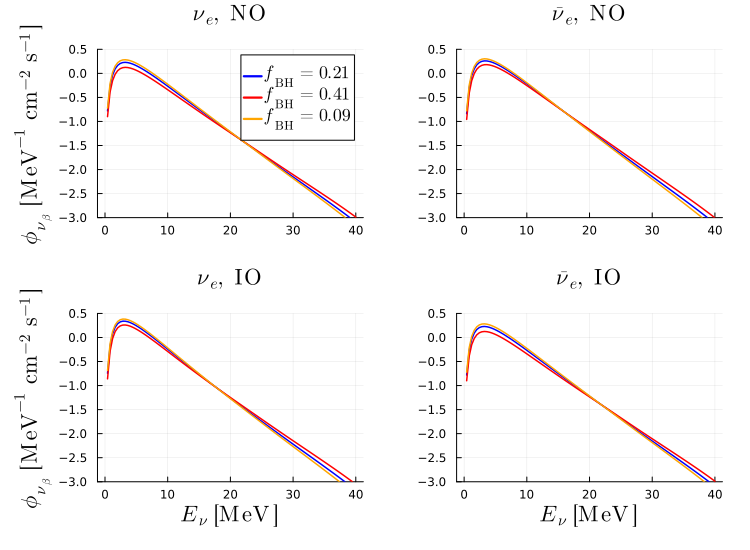

In [ ]:
p1 = plot(es_dsnb, 
    [log10.(dsnb_test_e_f21) log10.(dsnb_test_e_f41) log10.(dsnb_test_e_f09)],
    c=[:blue :red :orange],
    lw=1.5,
    label=[L"f_\mathrm{BH} = 0.21" L"f_\mathrm{BH} = 0.41" L"f_\mathrm{BH} = 0.09"],
    title=L"\nu_e,~\mathrm{NO}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=12,
)

p2 = plot(es_dsnb, 
    [log10.(dsnb_test_ebar_f21) log10.(dsnb_test_ebar_f41) log10.(dsnb_test_ebar_f09)],
    c=[:blue :red :orange],
    label=false,
    title=L"\bar{\nu}_e,~\mathrm{NO}",
    titlefontsize=15,
    lw=1.5
)

p3 = plot(es_dsnb, 
    [log10.(dsnb_test_e_f21_IO) log10.(dsnb_test_e_f41_IO) log10.(dsnb_test_e_f09_IO)],
    c=[:blue :red :orange],
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    title=L"\nu_e,~\mathrm{IO}",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    label=false,
    titlefontsize=15,
    xguidefontsize=15,
    yguidefontsize=15,
    lw=1.5
)

p4 = plot(es_dsnb, 
    [log10.(dsnb_test_ebar_f21_IO) log10.(dsnb_test_ebar_f41_IO) log10.(dsnb_test_ebar_f09_IO)],
    c=[:blue :red :orange],
    title=L"\bar{\nu}_e,~\mathrm{IO}",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    label=false,
    lw=1.5
)

plot(p1, p2, p3, p4, layout=(2,2), size=(750, 550), ylim=(-3, 0.5), margins=5Plots.mm)

In [ ]:
# Trying to implement decays now

# Define this effective length function
energy_matter, energy_dark, H0 = 0.3, 0.7, 70
LeffIntegrand(z) = (H0*sqrt(energy_matter*(1+z)^3 + energy_dark))^(-1)*(1+z)^(-2)

leff_quadint(z0) = quadgk(z -> LeffIntegrand(z), 0, z0)[1]

zs_leff = range(0, 5, 1000)
leff_ne = Interpolations.interpolate((vec(zs_leff),), leff_quadint.(zs_leff), Gridded(Linear()))
leff = extrapolate(leff_ne, 0.0)

function decay(E, α, z)
    scalefactor = 4.678e28
    return exp(-scalefactor*α*leff(z)/E)
end

decay (generic function with 1 method)

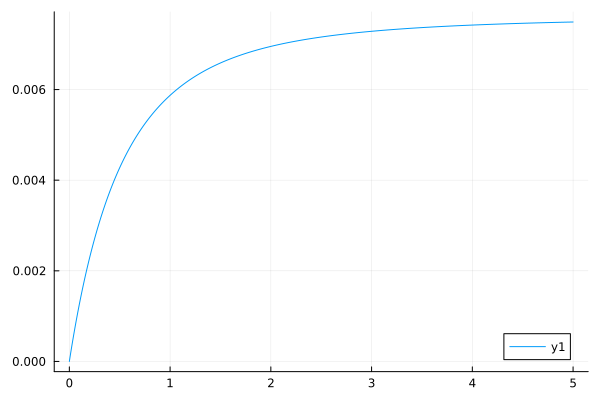

In [ ]:
plot(zs_leff, leff.(zs_leff))

In [ ]:
Usqred_NO

3×3 Matrix{Float64}:
 0.667424   0.310575  0.022001
 0.0776161  0.360937  0.561447
 0.25496    0.328488  0.416552

In [ ]:
quadgk(z -> DSNB_integrand(10, z, "e", "NO", "21")*decay(10, 10^(-21), z), 0, 5)

(0.0, 0.0)

In [ ]:
function decay_integrand(E, z, α, β, ordering, bh_frac)
    if α == 0
        return DSNB_integrand(E, z, β, ordering, bh_frac)
    else
        return DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α, z)
    end
end

function DSNB_idecay(E, α::Vector{Float64}, β, ordering, bh_frac)
    if ordering == "NO"
        ν1 = @. Usqred_NO[1, 1]*quadgk(z -> decay_integrand(E, z, α[1], β, ordering, bh_frac), 0, 5)[1]
        ν2 = @. Usqred_NO[1, 2]*quadgk(z -> decay_integrand(E, z, α[2], β, ordering, bh_frac), 0, 5)[1]
        ν3 = @. Usqred_NO[1, 3]*quadgk(z -> decay_integrand(E, z, α[3], β, ordering, bh_frac), 0, 5)[1]
        return 0.00208*[ν1, ν2, ν3]
    elseif ordering == "IO"
        ν1 = @. Usqred_IO[1, 1]*quadgk(z -> DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α[1], z), 0, 5)[1]
        ν2 = @. Usqred_IO[1, 2]*quadgk(z -> DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α[2], z), 0, 5)[1]
        ν3 = @. Usqred_IO[1, 3]*quadgk(z -> DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α[3], z), 0, 5)[1]
        return 0.00208*[ν1, ν2, ν3]
    else
        return 0.0
    end
end

DSNB_idecay (generic function with 1 method)

In [ ]:
ν1(E) = @. Usqred_NO[1, 1]*quadgk(z -> DSNB_integrand(E, z, "e", "NO", "21")*decay(E, 10^(-25), z), 0, 5)[1]

ν1 (generic function with 1 method)

In [ ]:
es_test = dsnb_sim_es

# DSNB_test_decay = DSNB_idecay(es_test, [10^(-25), 0.0, 0.0], "e", "NO", "21")
DSNB_test_no_decay_ν1, DSNB_test_no_decay_ν2, DSNB_test_no_decay_ν3 = DSNB_idecay(es_test, [0.0, 0.0, 0.0], "e", "NO", "41");

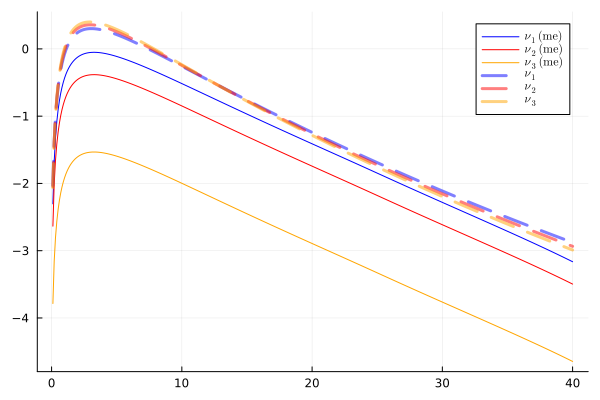

In [ ]:
plot(
    es_test,
    [log10.(DSNB_test_no_decay_ν1) log10.(DSNB_test_no_decay_ν2) log10.(DSNB_test_no_decay_ν3)],
    c=[:blue :red :orange],
    label=[L"\nu_1~\mathrm{(me)}" L"\nu_2~\mathrm{(me)}" L"\nu_3~\mathrm{(me)}"]
)
plot!(
    es_test,
    [log10.(dsnb_sim_ν1) log10.(dsnb_sim_ν2) log10.(dsnb_sim_ν3)],
    ls=:dash,
    lw=3,
    alpha=0.5,
    c=[:blue :red :orange],
    label=[L"\nu_1" L"\nu_2" L"\nu_3"]
)